# Model Selection

## Imports

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import scipy as sp

In [4]:
import statsmodels.api as sm

In [5]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

In [6]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

## Preamble

In [7]:
plt.rc('font',   size=16)          # controls default text sizes
plt.rc('axes',   titlesize=18)     # fontsize of the axes title
plt.rc('axes',   labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=18)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=18)     # fontsize of the tick labels
plt.rc('legend', fontsize=18)      # legend fontsize
plt.rc('figure', titlesize=18)     # fontsize of the figure title

## The Dataset

In [8]:
rng = np.random.default_rng(3256)
N = 20
x = np.linspace(0, 3, N)
y = x * np.sin(x) + rng.normal(0, 0.1, N)

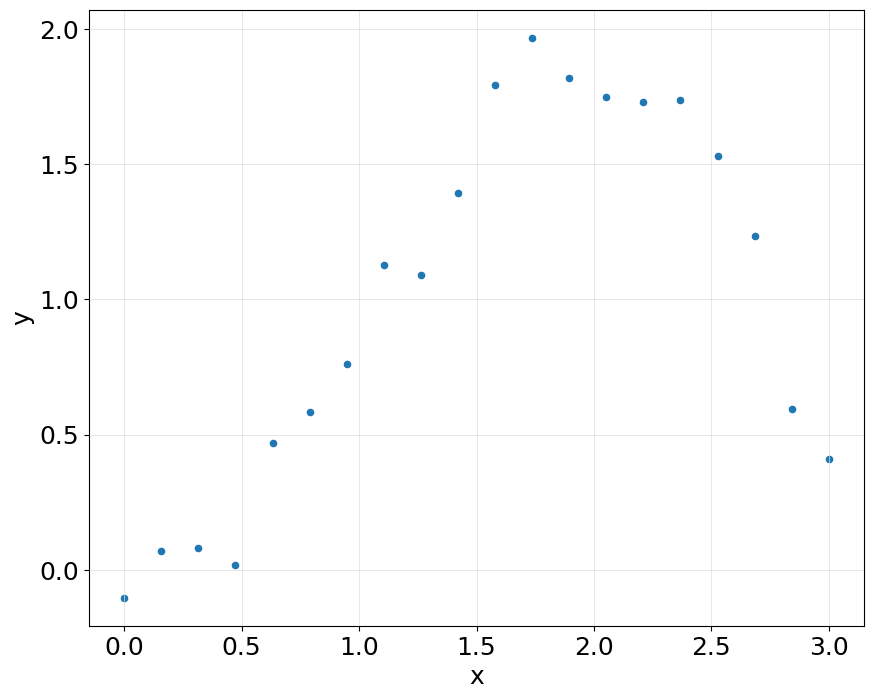

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_facecolor('white')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

---

## AIC and BIC

Compute the AIC and the BIC for the different polynomial models, going from order 1 (linear) to order 8.

In [10]:
AIC = []
BIC = []
for degree in range(1,9):
    X = np.vander(x, degree+1, increasing=True)                # Nifty numpy trick to get the proper design matrix
    myModel = sm.OLS(y, X)
    myFit = myModel.fit()
    AIC.append(myFit.aic)
    BIC.append(myFit.bic)
    
AIC = np.array(AIC)
BIC = np.array(BIC)

In [11]:
deltaAIC = AIC - AIC.min()
deltaBIC = BIC - BIC.min()

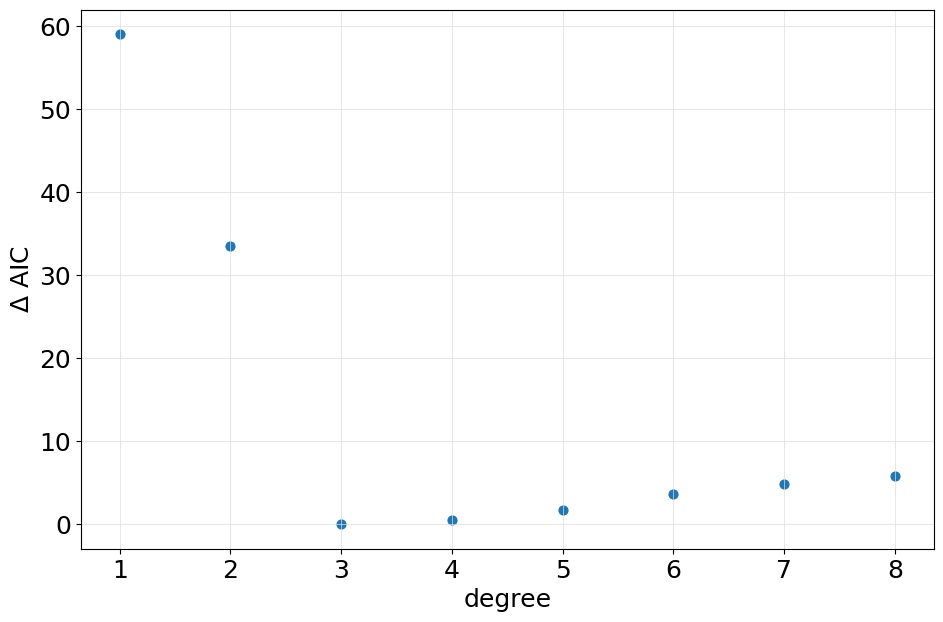

In [12]:
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(range(1,9), deltaAIC, s=40)
ax.set_xlabel("degree")
ax.set_ylabel("$\Delta$ AIC")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

Compute the normalized AIC weights:

In [13]:
expAIC = np.exp(-0.5*deltaAIC)
wAIC = expAIC / expAIC.sum()

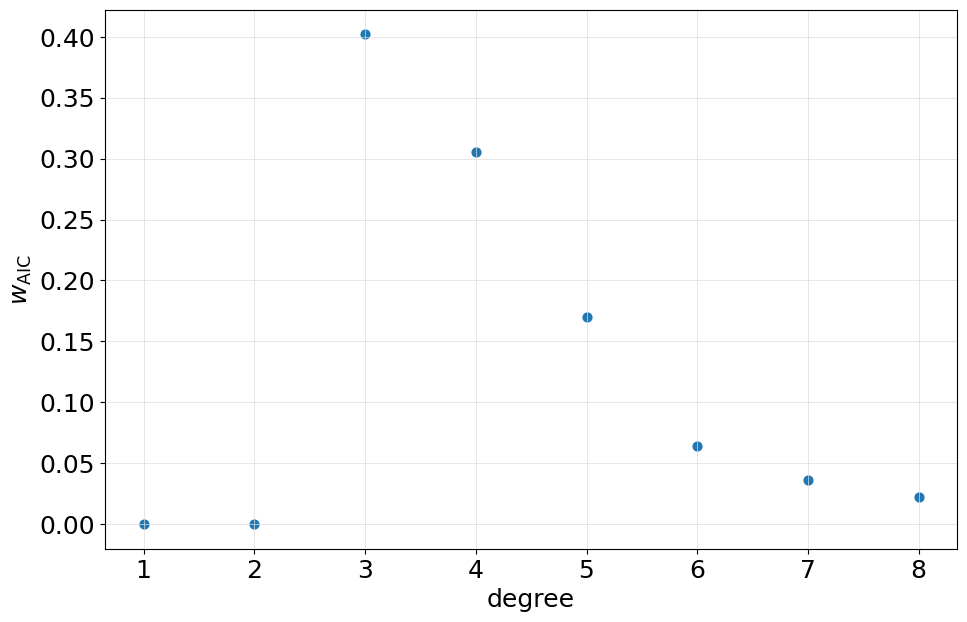

In [14]:
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(range(1,9), wAIC, s=40)
ax.set_xlabel("degree")
ax.set_ylabel(r"$w_{\rm AIC}$")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

Show the same for the BIC:

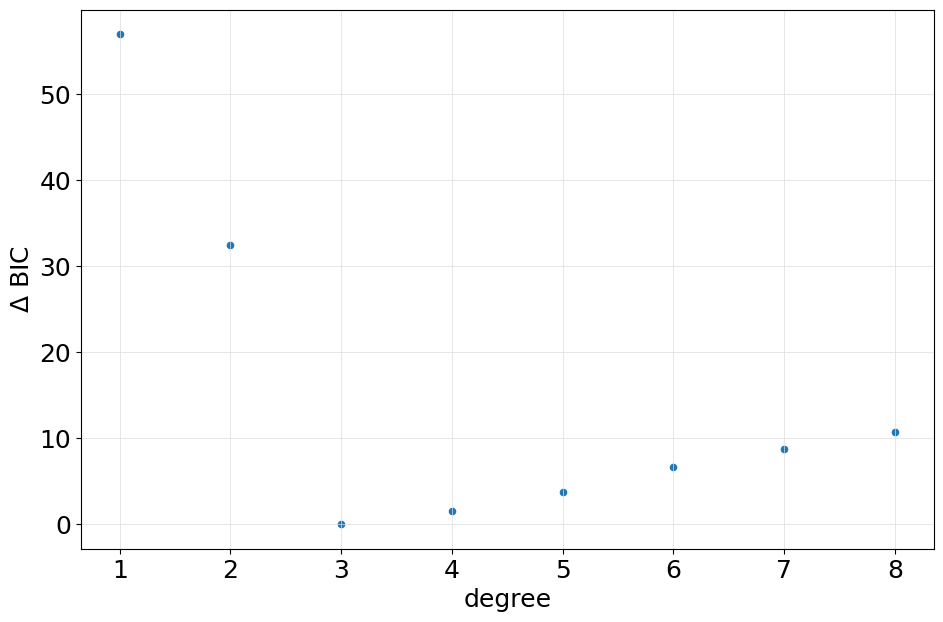

In [15]:
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(range(1,9), deltaBIC, s=20)
ax.set_xlabel("degree")
ax.set_ylabel("$\Delta$ BIC")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

Compute the normalized BIC weights:

In [16]:
expBIC = np.exp(-0.5*deltaBIC)
wBIC = expBIC / expBIC.sum()

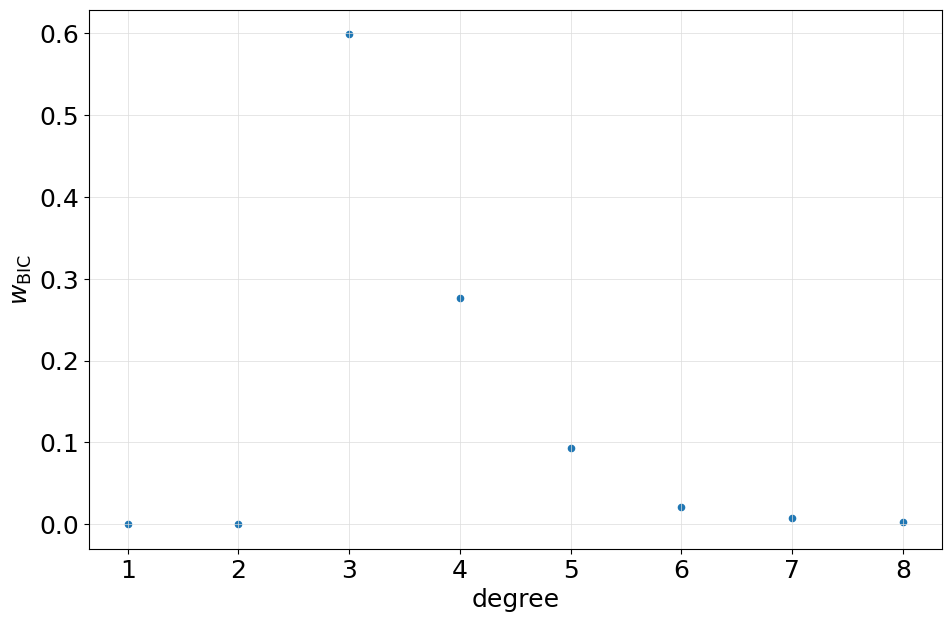

In [17]:
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(range(1,9), wBIC, s=20)
ax.set_xlabel("degree")
ax.set_ylabel(r"$w_{\rm BIC}$")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

---

## Cross-validation

Create a synthetic dataset:

In [18]:
rng = np.random.default_rng(3256)
N = 40
x = np.linspace(0, 3, N)
y = x * np.sin(x) + rng.normal(0, 0.1, N)

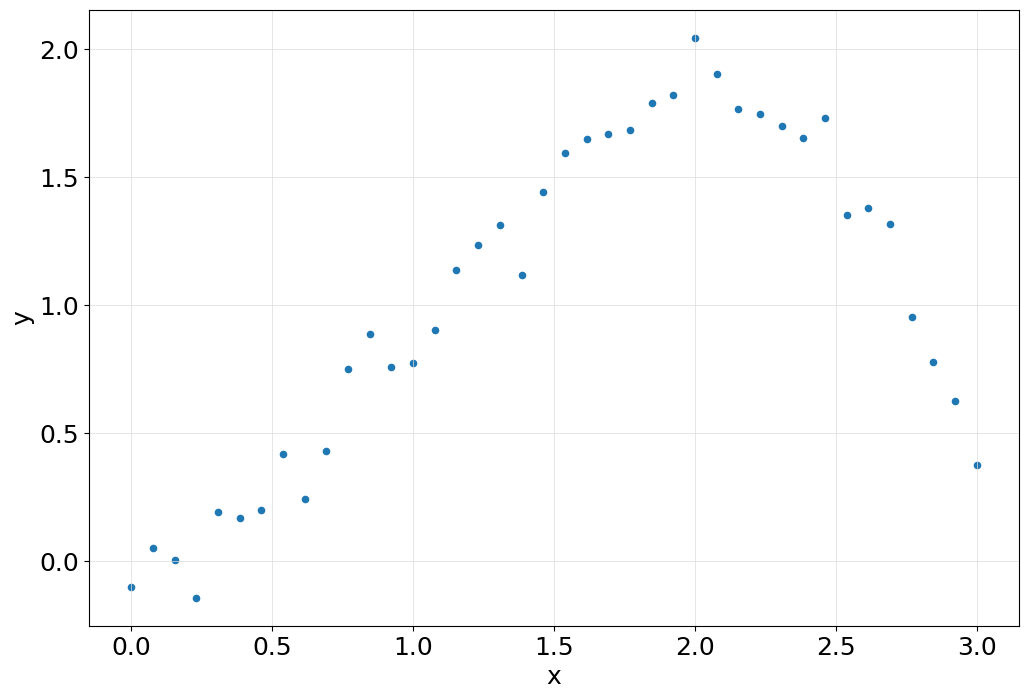

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x, y, s=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

### Basic cross-validation

Split the dataset in a training and a test set.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=124)

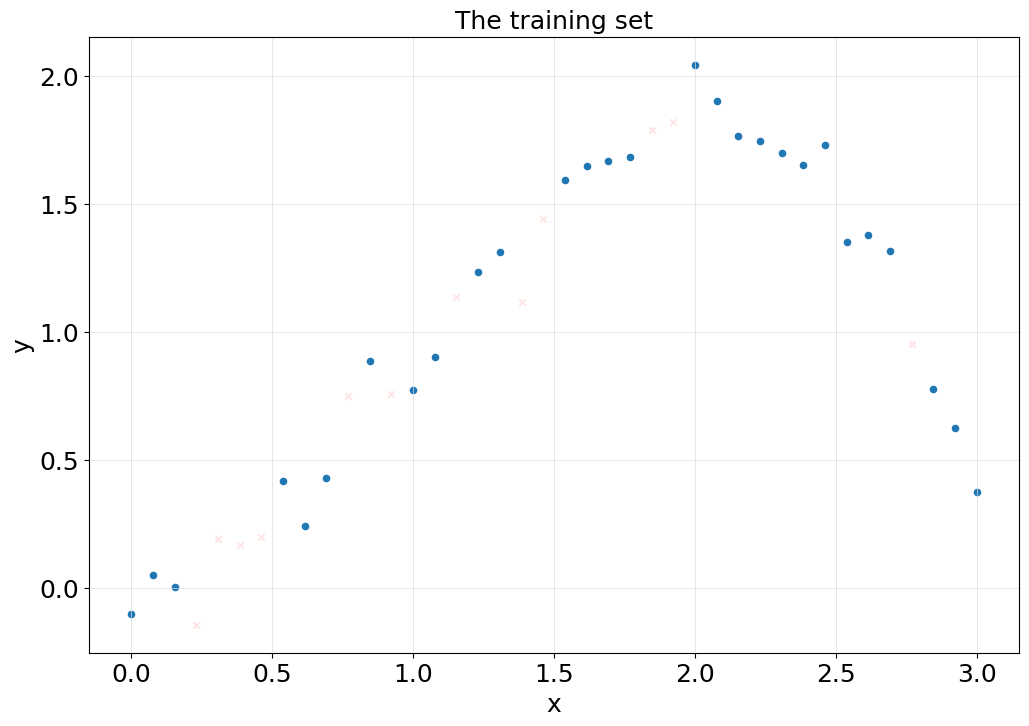

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x_train, y_train, s=20)
ax.scatter(x_test, y_test, marker='x', c="red", s=20, alpha=0.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
ax.set_title("The training set")
plt.show()

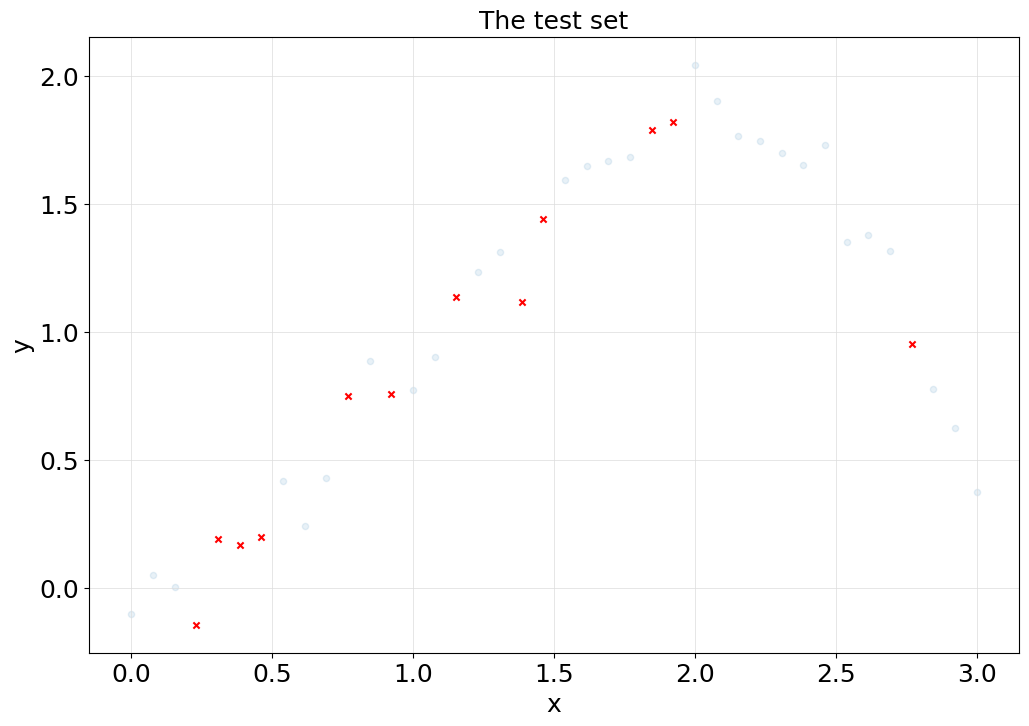

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(x_train, y_train, s=20, alpha=0.1)
ax.scatter(x_test, y_test, marker='x', c="red", s=20, alpha=1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
ax.set_title("The test set")
plt.show()

#### Comparing different polynomial orders

Compute the test error for polynomial models of different orders

In [23]:
testError = []
polynomialOrders = range(3,11)
for order in polynomialOrders:           
    X = np.vander(x, order+1, increasing=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=124)
    myFit = sm.OLS(y_train, X_train).fit()
    testError.append(np.sum((y_test - myFit.predict(X_test))**2) / len(y_test))

Plot the results:

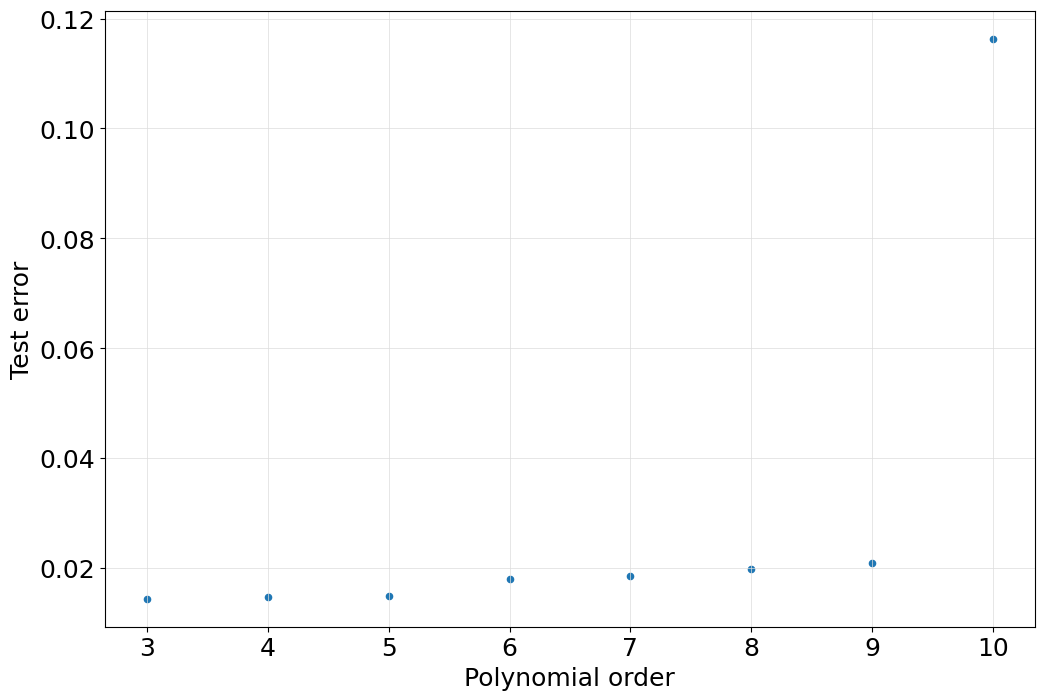

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.scatter(polynomialOrders, testError, s=20, alpha=1)
#plt.hlines([0.01, 0.01], 2.5, 10.5, linestyle="dashed", linewidth=1)
ax.set_xlabel("Polynomial order")
ax.set_ylabel("Test error")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

Although order 3 is the best value, orders 4 and 5 are almost as good.

### K-fold cross-validation

If you don't want to put all your faith in just one test set, you can use K-fold cross-validation.

In [25]:
fold = KFold(n_splits=5, shuffle=True, random_state=45)

fold.split() does not give you the training and the test data itself, but the **indices** of the training and the test data.

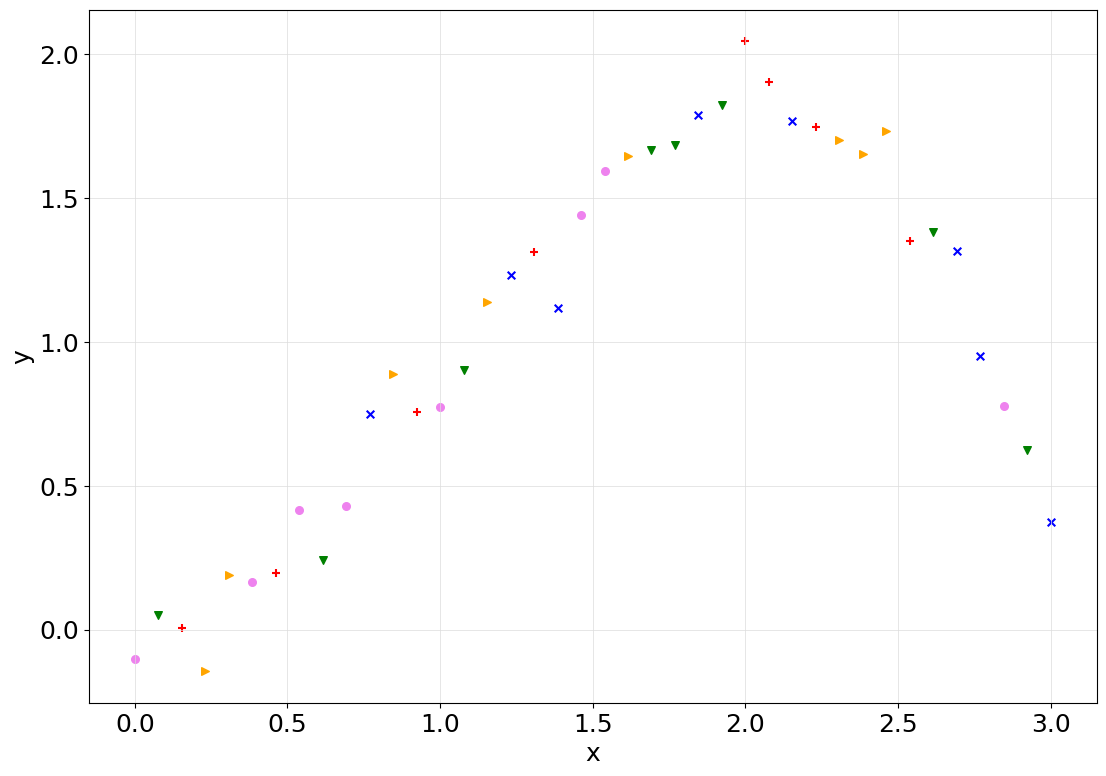

In [26]:
fig, ax = plt.subplots(1,1, figsize=(13,9))
colors = ['violet', 'blue', 'red', 'green', 'orange']
markers = ['o', 'x', '+', 'v', '>']
for n, (train, test) in enumerate(fold.split(y)):
    ax.scatter(x[test], y[test], c=colors[n], marker=markers[n], s=30)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

#### Use 5-fold cross-validation to test the different polynomial models 

In [27]:
nrOfFolds = 5
fold = KFold(n_splits=nrOfFolds, shuffle=True, random_state=4025)

In [28]:
orders = range(2,8)                                       # different polynomial orders we want to test

In [29]:
meanTestError = np.zeros(len(orders))                     # one value for each polynomial order

In [30]:
for n,order in enumerate(orders):
    X = np.vander(x, order+1, increasing=True)
    for train,test in fold.split(y):
        myFit = sm.OLS(y[train], X[train]).fit()
        meanTestError[n] += np.sum((y[test] - myFit.predict(X[test]))**2) / len(y[test])

    meanTestError[n] /= nrOfFolds

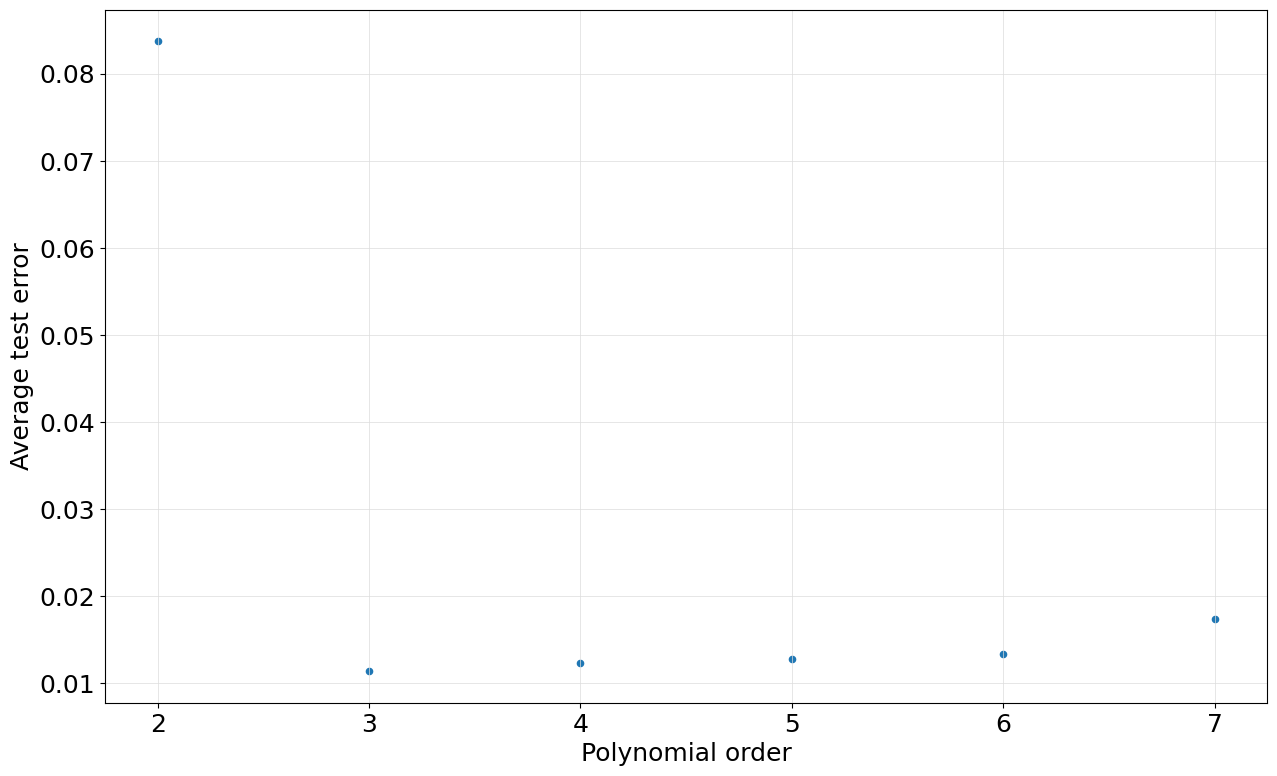

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
ax.scatter(orders, meanTestError, s=20)
ax.set_xlabel("Polynomial order")
ax.set_ylabel("Average test error")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

The model with order 3 comes out as best.

### Leave-one-out cross-validation

We will use LOOCV to test two nested models of different complexity.

In [32]:
Xmodel1 = sm.add_constant(np.column_stack([x, x**2, x**3, x**4]))
Xmodel2 = sm.add_constant(np.column_stack([x, x**2]))

In [33]:
loo = LeaveOneOut()

In [34]:
meanTestError1 = 0
meanTestError2 = 0

loo = LeaveOneOut()
for train,test in loo.split(y):
    myFit1 = sm.OLS(y[train], Xmodel1[train]).fit()
    myFit2 = sm.OLS(y[train], Xmodel2[train]).fit()
    meanTestError1 += np.sum((y[test] - myFit1.predict(Xmodel1[test]))**2) / len(y[test])
    meanTestError2 += np.sum((y[test] - myFit2.predict(Xmodel2[test]))**2) / len(y[test])

meanTestError1 /= len(y)
meanTestError2 /= len(y)

In [35]:
print(meanTestError1, meanTestError2)

0.012010373896815259 0.07388132917524072


The first (more complex) model has a better prediction power than the quadratic model.

***